In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("data/Telco-Customer-Churn.csv")
original_df=df.copy()

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df=df.drop('customerID',axis=1)

In [6]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#Here, total charges of the type object but it contains numeric values, so should be converted in numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
cat_cols=df.select_dtypes(include='object').columns.to_list()
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [12]:
num_cols=df.select_dtypes(include='number').columns.to_list()
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

SeniorCitizen


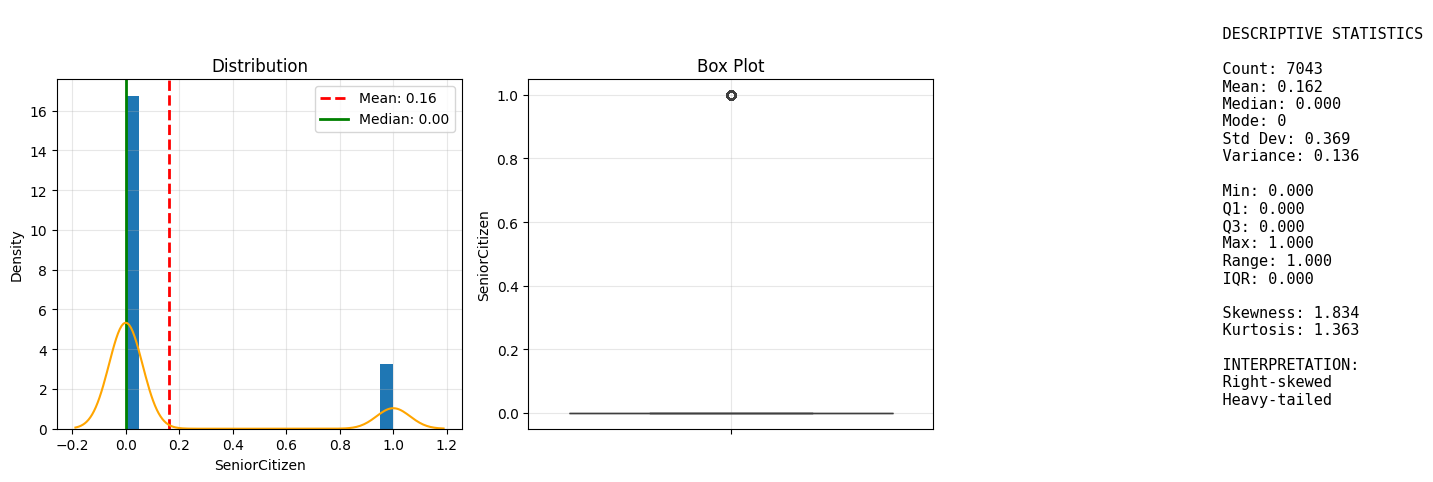

tenure


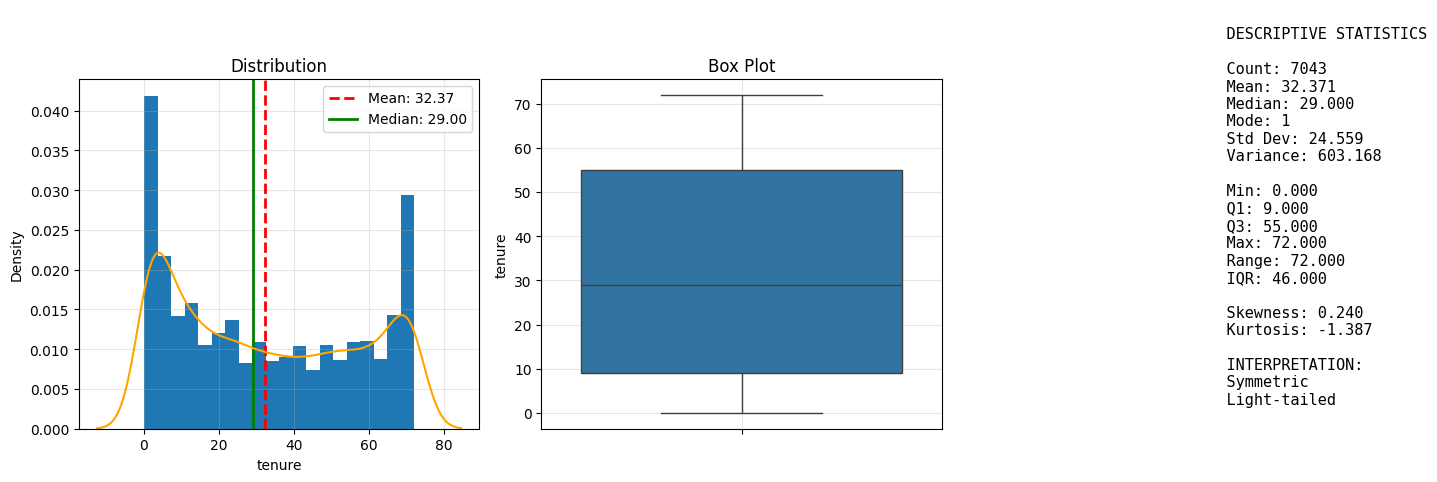

MonthlyCharges


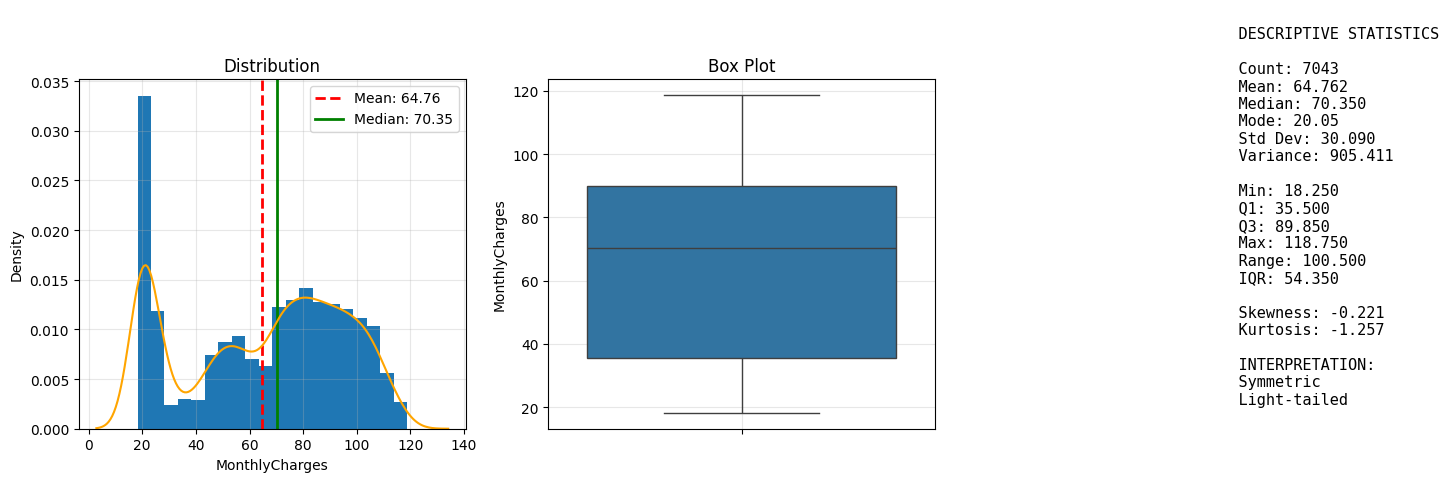

TotalCharges


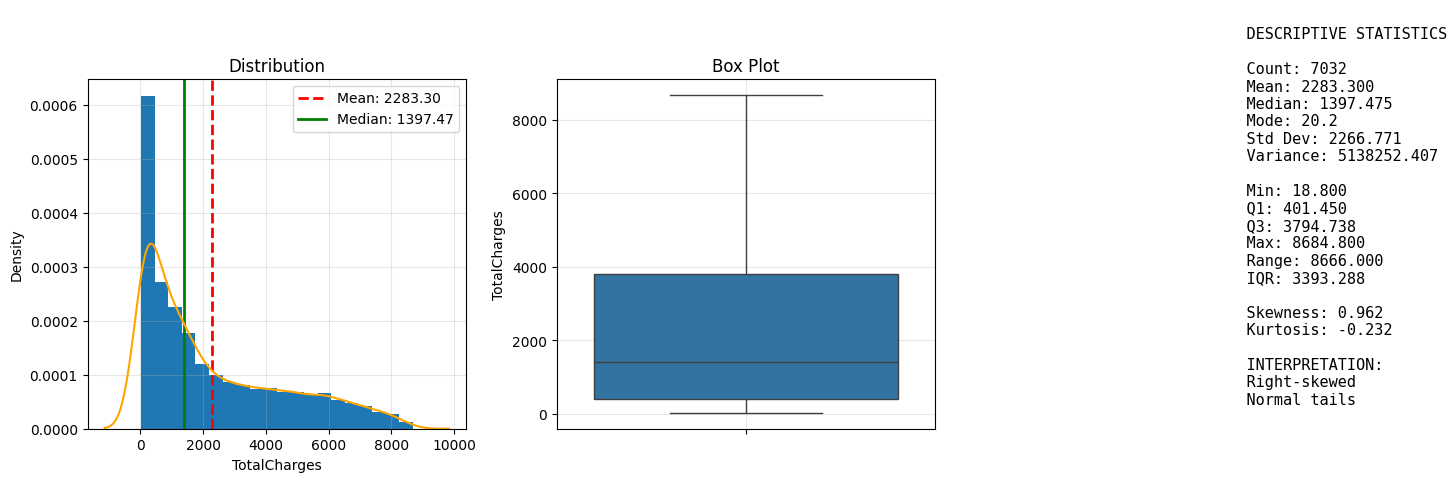

In [13]:
def UA_nums(df, num_cols):
    for col in num_cols:
        print(col)
        stats = {
            'count': df[col].count(),
            'mean': df[col].mean(),
            'median': df[col].median(),
            'mode': df[col].mode().iloc[0] if not df[col].mode().empty else "No unique mode",
            'std': df[col].std(),
            'min': df[col].min(),
            'max': df[col].max(),
            'range': df[col].max() - df[col].min(),
            'q1': df[col].quantile(0.25),
            'q3': df[col].quantile(0.75),
            'iqr': df[col].quantile(0.75) - df[col].quantile(0.25),
            'skewness': df[col].skew(),
            'kurtosis': df[col].kurtosis()
        }
        fig, axes=plt.subplots(1,3,figsize=(15,5))
        axes[0].hist(df[col],bins=20,density=True)
        axes[0].axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f"Mean: {stats['mean']:.2f}")
        axes[0].axvline(stats['median'], color='green', linestyle='-', linewidth=2, label=f"Median: {stats['median']:.2f}")
        sns.kdeplot(df[col].dropna(), ax=axes[0], color='orange')

        axes[0].set_title('Distribution')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Density')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)


        sns.boxplot(y=df[col], ax=axes[1])
        axes[1].set_title('Box Plot')
        axes[1].grid(True, alpha=0.3)

        # Statistics text
        axes[2].axis('off')
        stats_text = f"""
                    DESCRIPTIVE STATISTICS

                    Count: {stats['count']}
                    Mean: {stats['mean']:.3f}
                    Median: {stats['median']:.3f}
                    Mode: {stats['mode']}
                    Std Dev: {stats['std']:.3f}
                    Variance: {stats['std']**2:.3f}

                    Min: {stats['min']:.3f}
                    Q1: {stats['q1']:.3f}
                    Q3: {stats['q3']:.3f}
                    Max: {stats['max']:.3f}
                    Range: {stats['range']:.3f}
                    IQR: {stats['iqr']:.3f}

                    Skewness: {stats['skewness']:.3f}
                    Kurtosis: {stats['kurtosis']:.3f}

                    INTERPRETATION:
                    {'Right-skewed' if stats['skewness'] > 0.5 else 'Left-skewed' if stats['skewness'] < -0.5 else 'Symmetric'}
                    {'Heavy-tailed' if stats['kurtosis'] > 1 else 'Light-tailed' if stats['kurtosis'] < -1 else 'Normal tails'}
                """
        
        axes[2].text(0.1, 1.2, stats_text, transform=axes[2].transAxes, 
                    fontsize=11, verticalalignment='top', fontfamily='monospace')
        
        plt.tight_layout()
        plt.show()
    

UA_nums(df,num_cols)


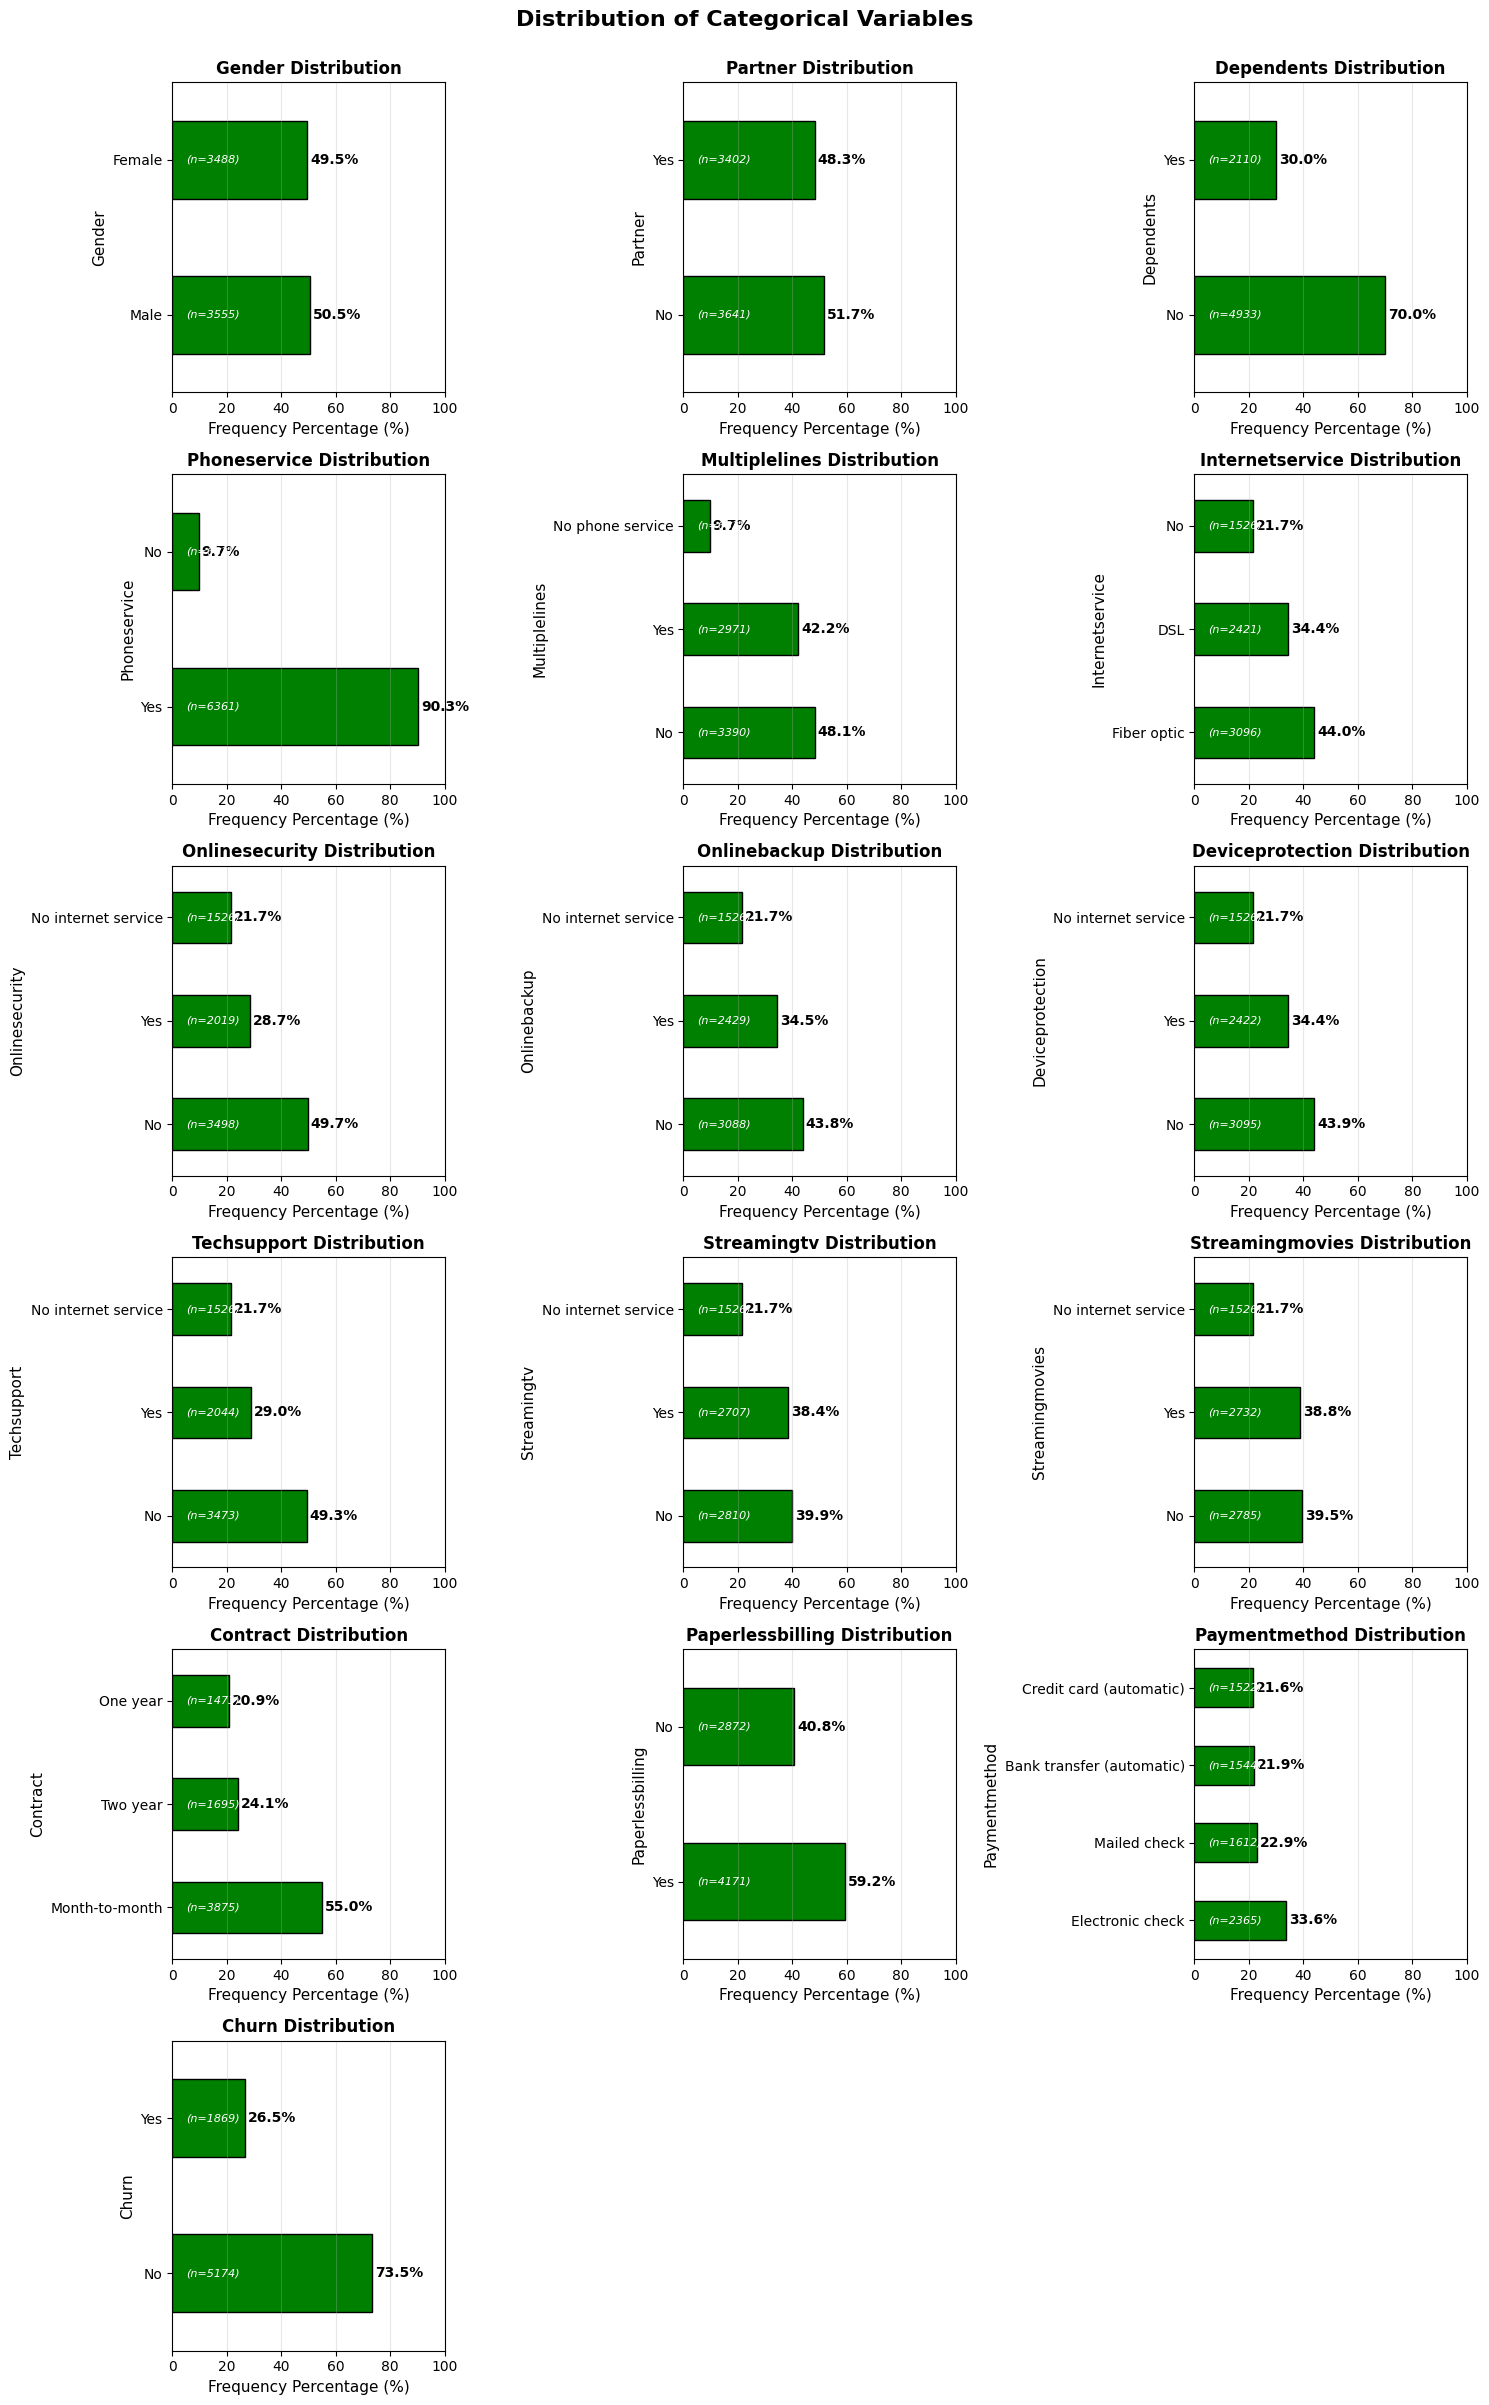


CATEGORICAL VARIABLES SUMMARY

GENDER:
----------------------------------------
  Male           : 3555 ( 50.5%)
  Female         : 3488 ( 49.5%)
  Total          : 7043 (100.0%)

PARTNER:
----------------------------------------
  No             : 3641 ( 51.7%)
  Yes            : 3402 ( 48.3%)
  Total          : 7043 (100.0%)

DEPENDENTS:
----------------------------------------
  No             : 4933 ( 70.0%)
  Yes            : 2110 ( 30.0%)
  Total          : 7043 (100.0%)

PHONESERVICE:
----------------------------------------
  Yes            : 6361 ( 90.3%)
  No             : 682 (  9.7%)
  Total          : 7043 (100.0%)

MULTIPLELINES:
----------------------------------------
  No             : 3390 ( 48.1%)
  Yes            : 2971 ( 42.2%)
  No phone service: 682 (  9.7%)
  Total          : 7043 (100.0%)

INTERNETSERVICE:
----------------------------------------
  Fiber optic    : 3096 ( 44.0%)
  DSL            : 2421 ( 34.4%)
  No             : 1526 ( 21.7%)
  Total         

In [14]:
import math
def UA_cat(df,cat_cols):
    max_cols_per_row=3
    size=len(cat_cols)
    rows=math.ceil(size/max_cols_per_row)

    fig_width = 5 * max_cols_per_row
    fig_height = 4 * rows

    fig,axes=plt.subplots(nrows=rows,ncols=max_cols_per_row,figsize=(fig_width,fig_height))
    if rows == 1:
        axes = axes.reshape(1, -1)

    for i,col in enumerate(cat_cols):
        row=i//max_cols_per_row
        col_idx=i%max_cols_per_row

        value_counts=df[col].value_counts(normalize=True).mul(100).sort_values(ascending=False)
        value_counts.plot(kind='barh',ax=axes[row,col_idx],width=0.5,color='green',edgecolor='black')
        # print(value_counts)
        for index,value in enumerate(value_counts):
            axes[row, col_idx].text(value + 1, index, f'{value:.1f}%', 
                                  fontsize=10, weight='bold', va='center')
           


        axes[row, col_idx].set_xlim([0, 100])
        axes[row, col_idx].set_xlabel('Frequency Percentage (%)', fontsize=11)
        axes[row, col_idx].set_ylabel(col.capitalize(), fontsize=11)
        axes[row, col_idx].set_title(f'{col.capitalize()} Distribution', fontsize=12, fontweight='bold')
        axes[row, col_idx].grid(axis='x', alpha=0.3)

        counts = df[col].value_counts().sort_values(ascending=False)
        for index, (category, count) in enumerate(counts.items()):
            axes[row, col_idx].text(5, index, f'(n={count})', 
                                  fontsize=8, style='italic', va='center', color='white')

    if size % max_cols_per_row != 0:
        for j in range(size % max_cols_per_row, max_cols_per_row):
            fig.delaxes(axes[rows-1, j])

    
    plt.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*60)
    print("CATEGORICAL VARIABLES SUMMARY")
    print("="*60)
    for col in cat_cols:
        print(f"\n{col.upper()}:")
        print("-" * 40)
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True).mul(100)
        for category in counts.index:
            print(f"  {category:15s}: {counts[category]:3d} ({percentages[category]:5.1f}%)")
        print(f"  {'Total':15s}: {counts.sum():3d} (100.0%)")
    print("\n" + "="*60)

    

UA_cat(df,cat_cols)


/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1476/2453999310.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[i], palette='Set2')
/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1476/2453999310.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[i], palette='Set2')
/var/folders/68/hjr0dmf11mdcgw23xxzbtqzc0000gn/T/ipykernel_1476/2453999310.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, ax=axes[i], palette='Set2')


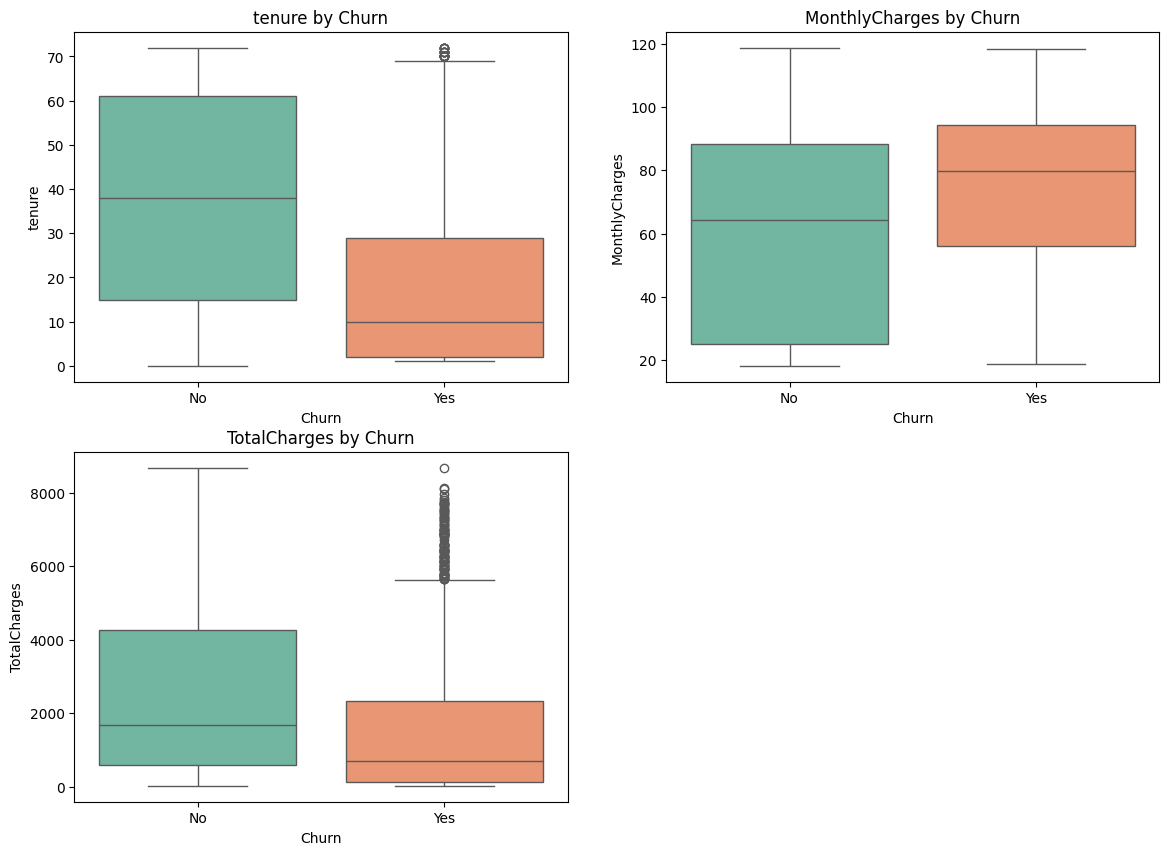

In [15]:
#Bivariate analysis

def Bivariate_analysis_numeric_cat(df,num_cols,target='Churn'):
    num_cols=[col for col in num_cols if col !='SeniorCitizen']
    n_num_cols = len(num_cols)
    rows = (len(num_cols) + 1) // 2
    
    fig, axes = plt.subplots(rows, 2, figsize=(14, 5*rows))
    axes = axes.flatten() if n_num_cols > 1 else [axes]

    # if rows == 1:
    #     axes = axes.reshape(1, -1)
    
    for i, col in enumerate(num_cols):
        # Create box plot
        sns.boxplot(data=df, x=target, y=col, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{col} by {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(col)


    if n_num_cols % 2 != 0:
        fig.delaxes(axes[-1])


Bivariate_analysis_numeric_cat(df,num_cols)
    
    

SeniorCitizen
0    23.606168
1    41.681261
Name: Churn, dtype: float64


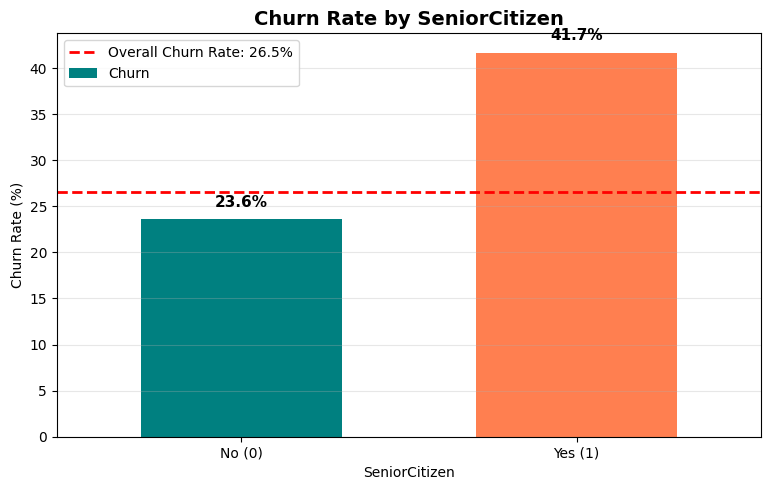

In [16]:
def analyze_binary_categorical(df, binary_cols,target='Churn'):
    n_cols=len(binary_cols)
    rows=(n_cols+1)//2

    fig,axes=plt.subplots(rows,2,figsize=(15,5*rows))
    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]


    for i, col in enumerate(binary_cols):
        churn_rate=df.groupby(col)[target].apply(lambda x: (x=='Yes').mean()*100)
        print(churn_rate)
        churn_rate.plot(kind='bar',ax=axes[i],color=['teal','coral'],width=0.6)
        axes[i].set_title(f'Churn Rate by {col}',fontsize=14,fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Churn Rate (%)')
        axes[i].set_xticklabels(['No (0)', 'Yes (1)'], rotation=0)

         # Add overall churn rate line
        overall_churn = (df[target] == 'Yes').mean() * 100
        axes[i].axhline(y=overall_churn, color='red', linestyle='--', 
                       linewidth=2, label=f'Overall Churn Rate: {overall_churn:.1f}%')
        
        # Add percentage labels on bars
        for j, v in enumerate(churn_rate):
            axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', va='bottom', 
                        fontweight='bold', fontsize=11)
        
        axes[i].legend()
        axes[i].grid(axis='y', alpha=0.3)

    
    if n_cols % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()


binary_cols=['SeniorCitizen']
analyze_binary_categorical(df,binary_cols)

In [17]:
def interpret_bivariate_analysis(df, num_cols, target='Churn'):
    """
    Provides detailed interpretation of numerical features vs categorical target
    """
    print("="*70)
    print("BIVARIATE ANALYSIS INTERPRETATION")
    print("="*70)
    
    for col in num_cols:
        print(f"\n{'='*70}")
        print(f"Feature: {col}")
        print(f"{'='*70}")
        
        # Statistical summary by churn status
        print("\n1. Statistical Summary:")
        summary = df.groupby(target)[col].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
        print(summary)
        
        # Calculate difference
        churn_yes_mean = df[df[target] == 'Yes'][col].mean()
        churn_no_mean = df[df[target] == 'No'][col].mean()
        difference = churn_yes_mean - churn_no_mean
        
        print(f"\n2. Mean Difference:")
        print(f"   Churned customers (Yes): {churn_yes_mean:.2f}")
        print(f"   Retained customers (No): {churn_no_mean:.2f}")
        print(f"   Difference: {difference:.2f}")
        
        # Interpretation
        print(f"\n3. Interpretation:")
        if difference > 0:
            print(f"   ✓ Customers who CHURNED have HIGHER {col}")
            print(f"   ✓ High {col} is associated with MORE churn")
        else:
            print(f"   ✓ Customers who CHURNED have LOWER {col}")
            print(f"   ✓ Low {col} is associated with MORE churn")
        
        # Statistical test
        from scipy import stats
        group_yes = df[df[target] == 'Yes'][col].dropna()
        group_no = df[df[target] == 'No'][col].dropna()
        t_stat, p_value = stats.ttest_ind(group_yes, group_no)
        
        print(f"\n4. Statistical Significance:")
        print(f"   P-value: {p_value:.6f}")
        if p_value < 0.05:
            print(f"   ✓ Difference is STATISTICALLY SIGNIFICANT (p < 0.05)")
        else:
            print(f"   ✗ Difference is NOT statistically significant")

# Run the analysis
interpret_bivariate_analysis(df, num_cols)

BIVARIATE ANALYSIS INTERPRETATION

Feature: SeniorCitizen

1. Statistical Summary:
       count      mean  median       std  min  max
Churn                                             
No      5174  0.128721     0.0  0.334923    0    1
Yes     1869  0.254682     0.0  0.435799    0    1

2. Mean Difference:
   Churned customers (Yes): 0.25
   Retained customers (No): 0.13
   Difference: 0.13

3. Interpretation:
   ✓ Customers who CHURNED have HIGHER SeniorCitizen
   ✓ High SeniorCitizen is associated with MORE churn

4. Statistical Significance:
   P-value: 0.000000
   ✓ Difference is STATISTICALLY SIGNIFICANT (p < 0.05)

Feature: tenure

1. Statistical Summary:
       count       mean  median        std  min  max
Churn                                               
No      5174  37.569965    38.0  24.113777    0   72
Yes     1869  17.979133    10.0  19.531123    1   72

2. Mean Difference:
   Churned customers (Yes): 17.98
   Retained customers (No): 37.57
   Difference: -19.59

3. Int

15
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
rows are 5
gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64
Partner
No     32.957979
Yes    19.664903
Name: Churn, dtype: float64
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64
PhoneService
No     24.926686
Yes    26.709637
Name: Churn, dtype: float64
MultipleLines
No                  25.044248
No phone service    24.926686
Yes                 28.609896
Name: Churn, dtype: float64
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn, dtype: float64
OnlineSecurity
No                     41.766724
No internet service     7.404980
Yes                    14.611194
Name: Churn, dtype: float64
OnlineBackup
No                     39.928756
No internet se

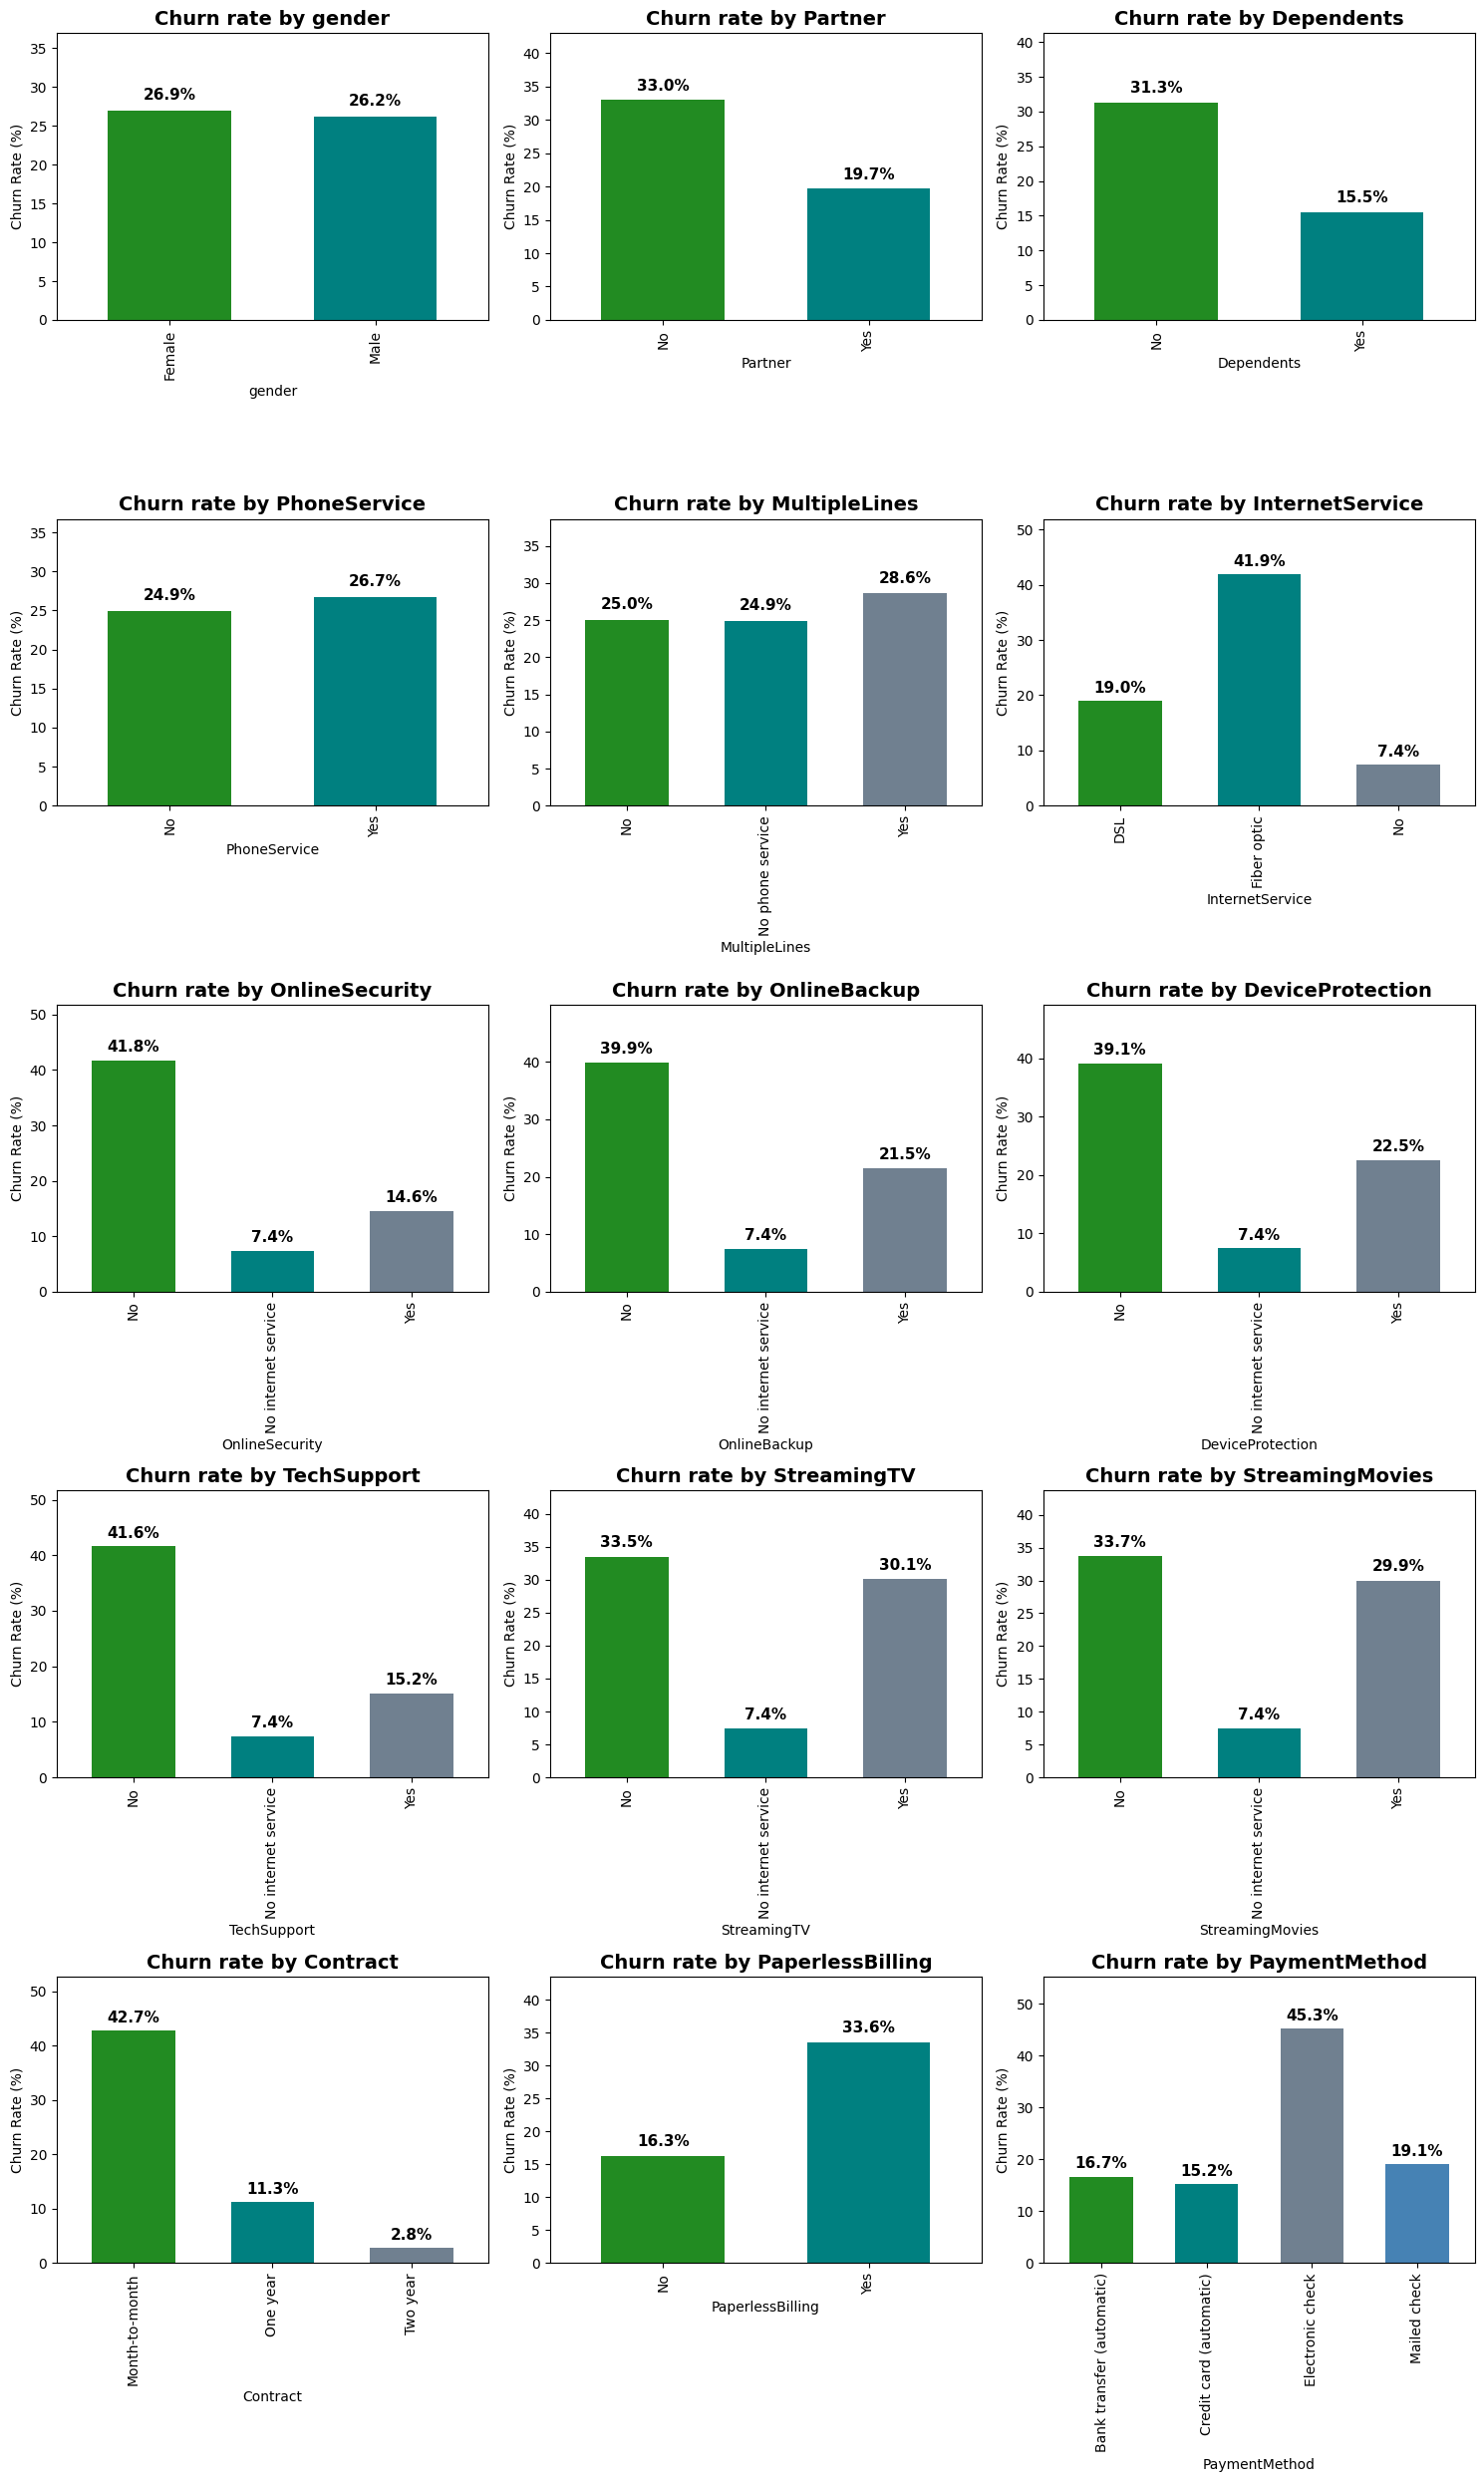

In [18]:
def cat_vs_cat_bivariate(df,cat_cols,target='Churn'):
    cat_cols=[col for col in cat_cols if col!=target]
    print(len(cat_cols))
    print((cat_cols))

    rows=(len(cat_cols) + 2) // 3
    print(f'rows are {rows}')
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5*rows))


    if isinstance(axes, np.ndarray):
        axes = axes.flatten()
    else:
        axes = [axes]


    for i, col in enumerate(cat_cols):
        churn_rate=df.groupby(col)[target].apply(lambda x: (x=='Yes').mean()*100)
        print(churn_rate)
        churn_rate.plot(kind='bar',ax=axes[i],color=['forestgreen','teal','slategray','steelblue'],width=0.6)
        axes[i].set_ylim(0, churn_rate.max() + 10)
        axes[i].set_title(f"Churn rate by {col}",fontsize=14,fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Churn Rate (%)')
        # sns.boxplot(x=target,y=col,data=df,ax=axes[i])

        # Add percentage labels on bars
        for j, v in enumerate(churn_rate):
            axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', va='bottom', 
                        fontweight='bold', fontsize=11)
        
    for j in range(i+1,len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


    

cat_vs_cat_bivariate(df,cat_cols)

In [19]:
# Create a summary table
import pandas as pd

churn_analysis = {
    'Feature': [
        'Contract', 'PaymentMethod', 'OnlineSecurity', 'TechSupport', 
        'InternetService', 'OnlineBackup', 'DeviceProtection', 
        'PaperlessBilling', 'Dependents', 'Partner', 
        'StreamingTV', 'StreamingMovies', 'PhoneService', 
        'MultipleLines', 'Gender'
    ],
    'Max_Churn_Rate': [42.7, 45.3, 41.8, 41.7, 41.9, 40.0, 39.1, 33.6, 31.3, 33.0, 33.7, 33.7, 26.7, 28.3, 26.9],
    'Min_Churn_Rate': [2.8, 15.2, 7.4, 7.4, 7.4, 7.4, 7.4, 16.3, 15.5, 19.7, 7.4, 7.4, 24.9, 24.9, 26.2],
    'Difference': [39.9, 30.1, 34.4, 34.3, 34.5, 32.6, 31.7, 17.3, 15.8, 13.3, 26.3, 26.3, 1.8, 3.4, 0.7],
    'Category': [
        'STRONG', 'STRONG', 'STRONG', 'STRONG', 'STRONG', 
        'STRONG', 'STRONG', 'STRONG', 'MODERATE', 'MODERATE',
        'WEAK*', 'WEAK*', 'WEAK', 'NO IMPACT', 'NO IMPACT'
    ]
}

summary_df = pd.DataFrame(churn_analysis)
summary_df = summary_df.sort_values('Difference', ascending=False)
print(summary_df.to_string(index=False))

# *Note: StreamingTV/Movies show 26.3% difference due to "No internet service" category,
# but only 3-4% difference between actual No/Yes users with internet

         Feature  Max_Churn_Rate  Min_Churn_Rate  Difference  Category
        Contract            42.7             2.8        39.9    STRONG
 InternetService            41.9             7.4        34.5    STRONG
  OnlineSecurity            41.8             7.4        34.4    STRONG
     TechSupport            41.7             7.4        34.3    STRONG
    OnlineBackup            40.0             7.4        32.6    STRONG
DeviceProtection            39.1             7.4        31.7    STRONG
   PaymentMethod            45.3            15.2        30.1    STRONG
     StreamingTV            33.7             7.4        26.3     WEAK*
 StreamingMovies            33.7             7.4        26.3     WEAK*
PaperlessBilling            33.6            16.3        17.3    STRONG
      Dependents            31.3            15.5        15.8  MODERATE
         Partner            33.0            19.7        13.3  MODERATE
   MultipleLines            28.3            24.9         3.4 NO IMPACT
    Ph

#### REVISED CATEGORIZATION

#### STRONG Churn Predictors (>10% difference)
* **Contract**: 42.7% → 2.8% = **39.9% difference** ⭐ STRONGEST
* **OnlineSecurity**: 41.8% → 7.4% = **34.4% difference**
* **TechSupport**: 41.7% → 7.4% = **34.3% difference**
* **OnlineBackup**: 40.0% → 7.4% = **32.6% difference**
* **DeviceProtection**: 39.1% → 7.4% = **31.7% difference**
* **InternetService**: 41.9% → 7.4% = **34.5% difference**
* **PaymentMethod**: 45.3% → 15.2% = **30.1% difference**
* **PaperlessBilling**: 33.6% → 16.3% = **17.3% difference**

---

#### MODERATE Churn Predictors (5-10% difference)
* **Partner**: 33.0% → 19.7% = **13.3% difference**
* **Dependents**: 31.3% → 15.5% = **15.8% difference**

---

#### WEAK Churn Predictors (<5% difference)
* **StreamingTV**: 33.7% → 7.4% (but 30.1% for "Yes" = **~3.6% difference** between No/Yes)
* **StreamingMovies**: (similar to StreamingTV)
* **PhoneService**: **~2% difference**

---

#### NO Impact (<2% difference)
* **Gender**: **0.7% difference**
* **MultipleLines**: **0.1% difference** between No/Yes

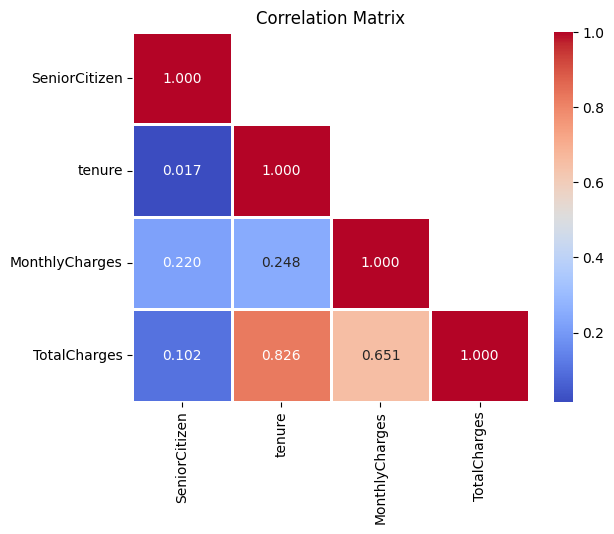

In [20]:
def multivariate_analysis(df,num_cols):
    corr_matrix=df[num_cols].corr()
    mask=np.triu(np.ones_like(corr_matrix,dtype=bool),k=1)
    ax=sns.heatmap(corr_matrix, annot=True,mask=mask,fmt='.3f',cmap='coolwarm',linewidths=1)
    ax.set_title("Correlation Matrix")


multivariate_analysis(df,num_cols)


#### Highly correlated features
1. Tenure and Totalcharges
2. monthlycharges and totalcharges

So, testing the variance Inflation factor


PART 2: MULTICOLLINEARITY DETECTION

       Feature      VIF
  TotalCharges 8.085198
        tenure 6.332737
MonthlyCharges 3.701617
 SeniorCitizen 1.257569

✅ Saved: multicollinearity_vif.png


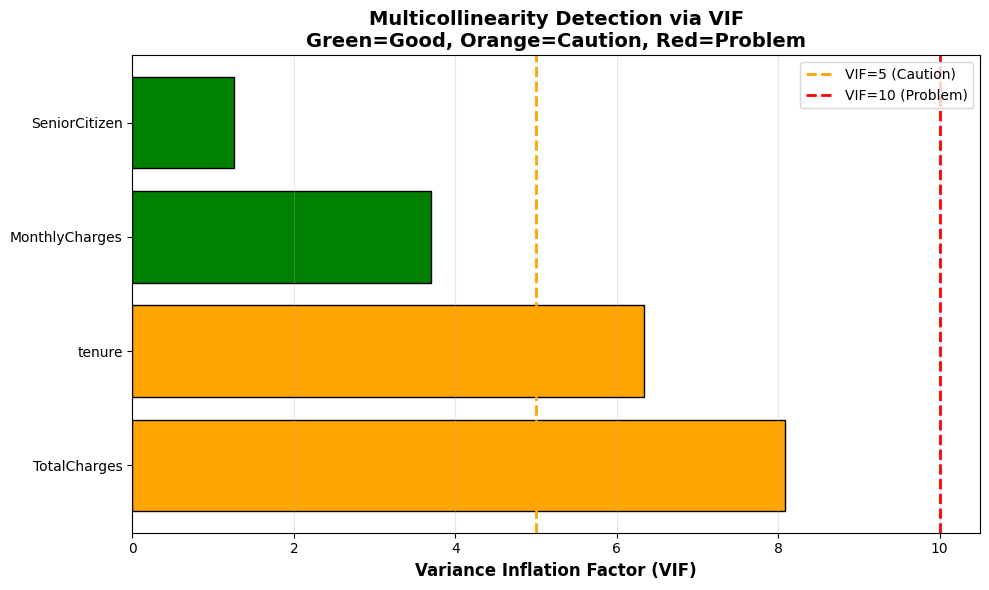


🔍 MULTICOLLINEARITY DIAGNOSIS

⚠️  MODERATE MULTICOLLINEARITY:
   • TotalCharges: VIF = 8.09
   • tenure: VIF = 6.33

   Recommendation: Monitor these features, may need action.

✅ LOW MULTICOLLINEARITY (Good!):
   • MonthlyCharges: VIF = 3.70
   • SeniorCitizen: VIF = 1.26


,Feature,VIF
0,TotalCharges,8.085198
1,tenure,6.332737
2,MonthlyCharges,3.701617
3,SeniorCitizen,1.257569


In [21]:
def detect_multicollinearity(df, num_cols):
    print("\n" + "="*70)
    print("PART 2: MULTICOLLINEARITY DETECTION")
    print("="*70)

    # Calculate VIF for each variable
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X = df[num_cols].dropna()

    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    # Sort by VIF
    vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)
    
    print("\n" + vif_data.to_string(index=False))
    
    # Visualize VIF
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_data['VIF']]
    bars = ax.barh(vif_data['Feature'], vif_data['VIF'], color=colors, edgecolor='black')
    
    # Add threshold lines
    ax.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='VIF=5 (Caution)')
    ax.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF=10 (Problem)')
    
    ax.set_xlabel('Variance Inflation Factor (VIF)', fontsize=12, fontweight='bold')
    ax.set_title('Multicollinearity Detection via VIF\nGreen=Good, Orange=Caution, Red=Problem', 
                fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('multicollinearity_vif.png', dpi=300, bbox_inches='tight')
    print("\n✅ Saved: multicollinearity_vif.png")
    plt.show()
    
    # Print recommendations
    print("\n" + "="*70)
    print("🔍 MULTICOLLINEARITY DIAGNOSIS")
    print("="*70)
    
    high_vif = vif_data[vif_data['VIF'] > 10]
    moderate_vif = vif_data[(vif_data['VIF'] >= 5) & (vif_data['VIF'] <= 10)]
    low_vif = vif_data[vif_data['VIF'] < 5]
    
    if len(high_vif) > 0:
        print("\n⚠️  HIGH MULTICOLLINEARITY DETECTED:")
        for _, row in high_vif.iterrows():
            print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
        print("\n   Recommendation: Consider removing or combining these features!")
    
    if len(moderate_vif) > 0:
        print("\n⚠️  MODERATE MULTICOLLINEARITY:")
        for _, row in moderate_vif.iterrows():
            print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
        print("\n   Recommendation: Monitor these features, may need action.")
    
    if len(low_vif) > 0:
        print("\n✅ LOW MULTICOLLINEARITY (Good!):")
        for _, row in low_vif.iterrows():
            print(f"   • {row['Feature']}: VIF = {row['VIF']:.2f}")
    
    return vif_data



detect_multicollinearity(df,num_cols)


#### Data Preprocessing

In [22]:
#If Z-score is >3, it indicates outliers
from scipy import stats
def outliers(df,num_cols):
    cols=num_cols
    z_score=np.abs(stats.zscore(df[cols].dropna()))
    print(z_score)
    z_outlier=(z_score>3).sum(axis=0)
    z_outlier_mask=(z_score>3).any(axis=1)
    # print(df[z_outlier_mask])

    for col , count in zip(cols,z_outlier):
        pct = (count / len(df)) * 100
        print(f"  {col:20s}: {count:4d} ({pct:5.2f}%)")


outliers(df,num_cols)

[[0.44032709 1.28024804 1.16169394 0.99419409]
 [0.44032709 0.06430269 0.26087792 0.17373982]
 [0.44032709 1.23950408 0.36392329 0.95964911]
 ...
 [0.44032709 0.87280842 1.17000405 0.85451414]
 [2.27103902 1.15801615 0.31916782 0.87209546]
 [0.44032709 1.36810945 1.35793167 2.01234407]]
  SeniorCitizen       :    0 ( 0.00%)
  tenure              :    0 ( 0.00%)
  MonthlyCharges      :    0 ( 0.00%)
  TotalCharges        :    0 ( 0.00%)


#### Donot need to handle outliers, as they are not that sensitive

In [23]:
# droppoing total charges as it is highly correlated
df=df.drop(columns='TotalCharges')

In [24]:
#split the data
features=[col for col in df.columns if col !='Churn']
X=df[features]
Y=df['Churn']

In [28]:
print(X)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1      

In [25]:
1. ## split in train test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [36]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05
2439,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90
5002,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95


In [35]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45


In [38]:
cat_train_cols=X_train.select_dtypes(include='object').columns
num_train_cols=X_train.select_dtypes(exclude='object').columns

In [39]:
print(cat_train_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [44]:
#encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def preprocessor(cat_cols,num_cols):
    # perform label encoder 
    preprocessor=ColumnTransformer(
        transformers=[
            ('cat',OneHotEncoder(handle_unknown='ignore',drop='first'),cat_cols),
            ('num',StandardScaler(),num_cols)
        ]
    )
  
    return preprocessor

encode_preprocessor=preprocessor(cat_train_cols,num_train_cols)

In [45]:
X_train_encoded=encode_preprocessor.fit_transform(X_train)
X_test_encoded=encode_preprocessor.transform(X_test)

In [63]:
pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
#handle class imbalance
from imblearn.over_sampling import SMOTE
def class_imbalance(X_train_encoded,y_train):
    smote=SMOTE(random_state=42)
    X_train_scaled_balanced,y_train_balanced=smote.fit_resample(X_train_encoded,y_train)
    return X_train_scaled_balanced,y_train_balanced,smote

X_train_scaled_balanced,y_train_balanced,smote=class_imbalance(X_train_encoded,y_train)

In [50]:
y_train_balanced

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
8271    Yes
8272    Yes
8273    Yes
8274    Yes
8275    Yes
Name: Churn, Length: 8276, dtype: object

In [51]:
#encoding y_train_balanced
# Separately encode TARGET (y) using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_balanced)  # Converts Yes/No to 1/0
y_test_encoded = label_encoder.transform(y_test)

In [52]:
### model traning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models={
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')

}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled_balanced, y_train_encoded)  # Use SMOTE data
    print(f"\n{name} trained!")


Logistic Regression trained!

Decision Tree trained!

Random Forest trained!

Gradient Boosting trained!

XGBoost trained!


In [54]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test_encoded)
    y_pred_proba = model.predict_proba(X_test_encoded)[:, 1]
    
    print(f"\n{'='*50}")
    print(f"{name}")
    print(f"{'='*50}")
    
    # Classification Report
    print(classification_report(y_test_encoded, y_pred))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_encoded, y_pred))
    
    # ROC-AUC Score
    print(f"ROC-AUC Score: {roc_auc_score(y_test_encoded, y_pred_proba):.4f}")


Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

Confusion Matrix:
[[768 268]
 [ 68 305]]
ROC-AUC Score: 0.8593

Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1036
           1       0.48      0.53      0.50       373

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.73      1409

Confusion Matrix:
[[821 215]
 [176 197]]
ROC-AUC Score: 0.6599

Random Forest
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1036
           1       0.60      0.57      0.59       373

    a

#### Testing by removing no impact and weak predictors

In [65]:
#split the data
# remove features 
features_to_remove=['gender','MultipleLines','PhoneService','StreamingMovies','StreamingTV']
X_train_selected=X_train.drop(columns=features_to_remove)
X_test_selected=X_test.drop(columns=features_to_remove)

In [61]:
# Update column lists
cat_cols_selected = [col for col in cat_train_cols if col not in features_to_remove]
num_cols_selected = num_train_cols.copy()

encode_preprocessor_v2 = preprocessor(cat_cols_selected, num_cols_selected)

In [62]:
X_train_selected_processed=encode_preprocessor_v2.fit_transform(X_train_selected)
X_test_selected_processed=encode_preprocessor_v2.transform(X_test_selected)

In [66]:
smote_v2= SMOTE(random_state=42)
X_train_balanced_v2, y_train_balanced_v2 = smote.fit_resample(
    X_train_selected_processed, 
    y_train
)

In [70]:
#encoding y_train_balanced
# Separately encode TARGET (y) using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder_V2 = LabelEncoder()
y_train_encoded_V2 = label_encoder_V2.fit_transform(y_train_balanced_v2)  # Converts Yes/No to 1/0
y_test_encoded_V2 = label_encoder_V2.transform(y_test)

In [72]:
# STEP 7: Train model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200)
gb_model.fit(X_train_balanced_v2, y_train_encoded_V2)

# STEP 8: Evaluate
y_pred = gb_model.predict(X_test_selected_processed)
print("\nModel with Feature Selection + SMOTE:")
print(classification_report(y_test_encoded_V2, y_pred))


Model with Feature Selection + SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1036
           1       0.58      0.73      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409



In [73]:
print(confusion_matrix(y_test_encoded_V2, y_pred))

[[841 195]
 [102 271]]


In [74]:
# Get probabilities
y_pred_proba = gb_model.predict_proba(X_test_selected_processed)[:, 1]

# Test different thresholds
print("\n" + "="*70)
print("THRESHOLD OPTIMIZATION - Reducing Missed Churners")
print("="*70)

results = []
for threshold in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    y_pred_t = (y_pred_proba >= threshold).astype(int)
    cm = confusion_matrix(y_test_encoded_V2, y_pred_t)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    results.append({
        'Threshold': threshold,
        'Missed Churners': fn,
        'Caught Churners': tp,
        'False Alarms': fp,
        'Recall': f"{recall:.1%}",
        'Precision': f"{precision:.1%}"
    })
    
    print(f"\nThreshold: {threshold}")
    print(f"  Missed: {fn} | Caught: {tp} | False Alarms: {fp}")
    print(f"  Recall: {recall:.1%} | Precision: {precision:.1%}")

# Show best threshold
results_df = pd.DataFrame(results)
print("\n" + "="*70)
print(results_df)
print("\n💡 Recommendation: Choose threshold that minimizes 'Missed Churners'")


THRESHOLD OPTIMIZATION - Reducing Missed Churners

Threshold: 0.25
  Missed: 39 | Caught: 334 | False Alarms: 378
  Recall: 89.5% | Precision: 46.9%

Threshold: 0.3
  Missed: 46 | Caught: 327 | False Alarms: 329
  Recall: 87.7% | Precision: 49.8%

Threshold: 0.35
  Missed: 62 | Caught: 311 | False Alarms: 288
  Recall: 83.4% | Precision: 51.9%

Threshold: 0.4
  Missed: 72 | Caught: 301 | False Alarms: 261
  Recall: 80.7% | Precision: 53.6%

Threshold: 0.45
  Missed: 82 | Caught: 291 | False Alarms: 227
  Recall: 78.0% | Precision: 56.2%

Threshold: 0.5
  Missed: 102 | Caught: 271 | False Alarms: 195
  Recall: 72.7% | Precision: 58.2%

   Threshold  Missed Churners  Caught Churners  False Alarms Recall Precision
0       0.25               39              334           378  89.5%     46.9%
1       0.30               46              327           329  87.7%     49.8%
2       0.35               62              311           288  83.4%     51.9%
3       0.40               72              3

#### Still not satisfied so, performing features engineering

In [76]:
def feature_engineering():
    weak_features = ['gender', 'MultipleLines']
    X_train_fe = X_train.drop(columns=weak_features).copy()
    X_test_fe = X_test.drop(columns=weak_features).copy()

    X_train_fe['HighRisk_Score']=(
        (X_train['Contract']=='Month-to-Month').astype(int)*5 +
        (X_train['OnlineSecurity']=='No').astype(int)*4 +
        (X_train['InternetService']=='Fiber optic').astype(int)*4 +
        (X_train['TechSupport']=='No').astype(int)*4 +
        (X_train['OnlineBackup']=='No').astype(int)*3 +
        (X_train['PaymentMethod']=='ELectronic check').astype(int)*3 +
        (X_train['PaperlessBilling']=='Yes').astype(int)*2
    )
    X_test_fe['HighRisk_Score']=(
        (X_test['Contract']=='Month-to-Month').astype(int)*5 +
        (X_test['OnlineSecurity']=='No').astype(int)*4 +
        (X_test['InternetService']=='Fiber optic').astype(int)*4 +
        (X_test['TechSupport']=='No').astype(int)*4 +
        (X_test['OnlineBackup']=='No').astype(int)*3 +
        (X_test['PaymentMethod']=='ELectronic check').astype(int)*3 +
        (X_test['PaperlessBilling']=='Yes').astype(int)*2
    )

    X_train_fe['NoSupport'] = (
    ((X_train['OnlineSecurity'] == 'No') | (X_train['OnlineSecurity'] == 'No internet service')) &
    ((X_train['TechSupport'] == 'No') | (X_train['TechSupport'] == 'No internet service'))
).astype(int)
    
    X_test_fe['NoSupport'] = (
    ((X_test['OnlineSecurity'] == 'No') | (X_test['OnlineSecurity'] == 'No internet service')) &
    ((X_test['TechSupport'] == 'No') | (X_test['TechSupport'] == 'No internet service'))
).astype(int)

    
    # 3. Vulnerable Customer (combines two strong predictors)
    X_train_fe['Vulnerable'] = (
        (X_train['Contract'] == 'Month-to-month') & 
        (X_train['PaymentMethod'] == 'Electronic check')
    ).astype(int)

    X_test_fe['Vulnerable'] = (
    (X_test['Contract'] == 'Month-to-month') & 
    (X_test['PaymentMethod'] == 'Electronic check')
).astype(int)
    

    # 4. Tenure to Monthly Charge Ratio (engagement indicator)
    X_train_fe['Tenure_Charge_Ratio'] = X_train['tenure'] / (X_train['MonthlyCharges'] + 1)
    X_test_fe['Tenure_Charge_Ratio'] = X_test['tenure'] / (X_test['MonthlyCharges'] + 1)


        # 5. Short tenure + high charges (risky combination)
    X_train_fe['ShortTenure_HighCharge'] = (
        (X_train['tenure'] < 12) & 
        (X_train['MonthlyCharges'] > X_train['MonthlyCharges'].median())
    ).astype(int)

    X_test_fe['ShortTenure_HighCharge'] = (
        (X_test['tenure'] < 12) & 
        (X_test['MonthlyCharges'] > X_train['MonthlyCharges'].median())
    ).astype(int)

    print("New Features Created:")

    return X_train_fe, X_test_fe



X_train_fe, X_test_fe=feature_engineering()
print(f"HighRisk_Score: min={X_train_fe['HighRisk_Score'].min()}, max={X_train_fe['HighRisk_Score'].max()}")
print(f"NoSupport: {X_train_fe['NoSupport'].value_counts().to_dict()}")
print(f"Vulnerable: {X_train_fe['Vulnerable'].value_counts().to_dict()}")
print(f"ShortTenure_HighCharge: {X_train_fe['ShortTenure_HighCharge'].value_counts().to_dict()}")

New Features Created:
HighRisk_Score: min=0, max=17
NoSupport: {1: 3261, 0: 2373}
Vulnerable: {0: 4171, 1: 1463}
ShortTenure_HighCharge: {0: 5028, 1: 606}


In [78]:
# Update column lists
cat_cols_fe = [col for col in cat_cols_selected if col in X_train_fe.columns]
num_cols_fe = list(num_cols_selected) + ['HighRisk_Score', 'NoSupport', 'Vulnerable', 
                                           'Tenure_Charge_Ratio', 'ShortTenure_HighCharge']

# Preprocess
#encoding
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def create_preprocessor(cat_cols,num_cols):
    # perform label encoder 
    preprocessor=ColumnTransformer(
        transformers=[
            ('cat',OneHotEncoder(handle_unknown='ignore',drop='first'),cat_cols),
            ('num',StandardScaler(),num_cols)
        ]
    )
  
    return preprocessor

encode_preprocessor=create_preprocessor(cat_train_cols,num_train_cols)


preprocessor_fe = preprocessor(cat_cols_fe, num_cols_fe)
X_train_fe_processed = preprocessor_fe.fit_transform(X_train_fe)
X_test_fe_processed = preprocessor_fe.transform(X_test_fe)

# Apply SMOTE
smote_fe = SMOTE(random_state=42)
X_train_fe_balanced, y_train_fe_balanced = smote_fe.fit_resample(
    X_train_fe_processed,
    y_train
)

print(f"\nAfter feature engineering and SMOTE:")
print(f"Training set: {X_train_fe_balanced.shape}")
print(f"Class distribution: {pd.Series(y_train_fe_balanced).value_counts().to_dict()}")


After feature engineering and SMOTE:
Training set: (8276, 26)
Class distribution: {'No': 4138, 'Yes': 4138}


In [80]:
#encoding y_train_balanced
# Separately encode TARGET (y) using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_fe_balanced = label_encoder.fit_transform(y_train_fe_balanced)  # Converts Yes/No to 1/0
y_test_encoded = label_encoder.transform(y_test)

In [81]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid focusing on recall
param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [4, 5, 6],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Custom scoring: balance recall and precision
from sklearn.metrics import make_scorer, fbeta_score

# F2 score weights recall 2x more than precision
f2_scorer = make_scorer(fbeta_score, beta=2)

gb_tuned = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    gb_tuned, 
    param_grid, 
    cv=5, 
    scoring=f2_scorer,  # Prioritizes recall but considers precision
    n_jobs=-1,
    verbose=2
)

print("Starting hyperparameter tuning (this will take 5-10 minutes)...")
grid_search.fit(X_train_fe_balanced, y_train_fe_balanced)

print("\n" + "="*70)
print("BEST PARAMETERS")
print("="*70)
print(grid_search.best_params_)
print(f"Best F2 Score: {grid_search.best_score_:.4f}")

# Get best model
best_gb_fe = grid_search.best_estimator_

Starting hyperparameter tuning (this will take 5-10 minutes)...
Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.05, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5,

In [82]:
best_gb_fe

GradientBoostingClassifier(learning_rate=0.05, max_depth=6, max_features='log2',
                           min_samples_leaf=2, min_samples_split=5,
                           n_estimators=200, random_state=42)

In [83]:
import joblib
joblib.dump(best_gb_fe,'best_gb_de.pkl')

['best_gb_de.pkl']

In [84]:
# Get prediction probabilities
y_pred_proba_tuned = best_gb_fe.predict_proba(X_test_fe_processed)[:, 1]

# Test multiple thresholds to find the sweet spot
print("\n" + "="*70)
print("THRESHOLD OPTIMIZATION - TUNED MODEL")
print("="*70)

results = []
for threshold in [0.25, 0.28, 0.30, 0.32, 0.35, 0.38, 0.40]:
    y_pred_t = (y_pred_proba_tuned >= threshold).astype(int)
    cm = confusion_matrix(y_test_encoded_V2, y_pred_t)
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    results.append({
        'Threshold': threshold,
        'Missed': fn,
        'Caught': tp,
        'False Alarms': fp,
        'Recall': f"{recall:.1%}",
        'Precision': f"{precision:.1%}",
        'F1': f"{f1:.3f}"
    })
    
    # Highlight if it meets your goal
    meets_goal = "TARGET!" if fn < 50 and fp < 300 else ""
    print(f"Threshold {threshold}: Missed={fn:2d}, FalseAlarms={fp:3d}, "
          f"Recall={recall:.1%}, Precision={precision:.1%} {meets_goal}")

# Show as table
print("\n" + "="*70)
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))


THRESHOLD OPTIMIZATION - TUNED MODEL
Threshold 0.25: Missed=44, FalseAlarms=366, Recall=88.2%, Precision=47.3% 
Threshold 0.28: Missed=51, FalseAlarms=342, Recall=86.3%, Precision=48.5% 
Threshold 0.3: Missed=56, FalseAlarms=316, Recall=85.0%, Precision=50.1% 
Threshold 0.32: Missed=60, FalseAlarms=299, Recall=83.9%, Precision=51.1% 
Threshold 0.35: Missed=65, FalseAlarms=280, Recall=82.6%, Precision=52.4% 
Threshold 0.38: Missed=74, FalseAlarms=253, Recall=80.2%, Precision=54.2% 
Threshold 0.4: Missed=78, FalseAlarms=238, Recall=79.1%, Precision=55.3% 

 Threshold  Missed  Caught  False Alarms Recall Precision    F1
      0.25      44     329           366  88.2%     47.3% 0.616
      0.28      51     322           342  86.3%     48.5% 0.621
      0.30      56     317           316  85.0%     50.1% 0.630
      0.32      60     313           299  83.9%     51.1% 0.636
      0.35      65     308           280  82.6%     52.4% 0.641
      0.38      74     299           253  80.2%     54

In [85]:
# Based on results above, choose the threshold that meets your goals
# Example: Let's say threshold 0.32 is best
optimal_threshold = 0.32  # ADJUST based on your results above

y_pred_optimal = (y_pred_proba_tuned >= optimal_threshold).astype(int)

print("\n" + "="*70)
print(f"FINAL TUNED MODEL (Threshold = {optimal_threshold})")
print("="*70)
print(classification_report(y_test_encoded_V2, y_pred_optimal))

cm_final = confusion_matrix(y_test_encoded_V2, y_pred_optimal)
print(f"\nConfusion Matrix:\n{cm_final}")

tn, fp, fn, tp = cm_final.ravel()
print("\n" + "="*70)
print("FINAL RESULTS")
print("="*70)
print(f"✅ Caught Churners: {tp} out of {tp+fn} ({tp/(tp+fn)*100:.1f}%)")
print(f"🚨 Missed Churners: {fn}")
print(f"⚠️  False Alarms: {fp}")
print(f"✅ Correct Non-Churn: {tn}")

# ROC-AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test_encoded_V2, y_pred_proba_tuned)
print(f"\n📊 ROC-AUC Score: {roc_auc:.4f}")


FINAL TUNED MODEL (Threshold = 0.32)
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1036
           1       0.51      0.84      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.75      0.76      1409


Confusion Matrix:
[[737 299]
 [ 60 313]]

FINAL RESULTS
✅ Caught Churners: 313 out of 373 (83.9%)
🚨 Missed Churners: 60
⚠️  False Alarms: 299
✅ Correct Non-Churn: 737

📊 ROC-AUC Score: 0.8557



TOP 20 MOST IMPORTANT FEATURES
                              Feature  Importance
                  Tenure_Charge_Ratio    0.138047
                       HighRisk_Score    0.127459
                               tenure    0.108589
                 PaperlessBilling_Yes    0.064738
                    Contract_Two year    0.064094
                       MonthlyCharges    0.060702
                    Contract_One year    0.049477
                          Partner_Yes    0.045426
       PaymentMethod_Electronic check    0.043663
                       Dependents_Yes    0.037074
          InternetService_Fiber optic    0.035215
                           Vulnerable    0.030461
                 DeviceProtection_Yes    0.026816
                   OnlineSecurity_Yes    0.020887
PaymentMethod_Credit card (automatic)    0.020598
                      TechSupport_Yes    0.018842
   OnlineSecurity_No internet service    0.018493
                     OnlineBackup_Yes    0.016723
               Sho

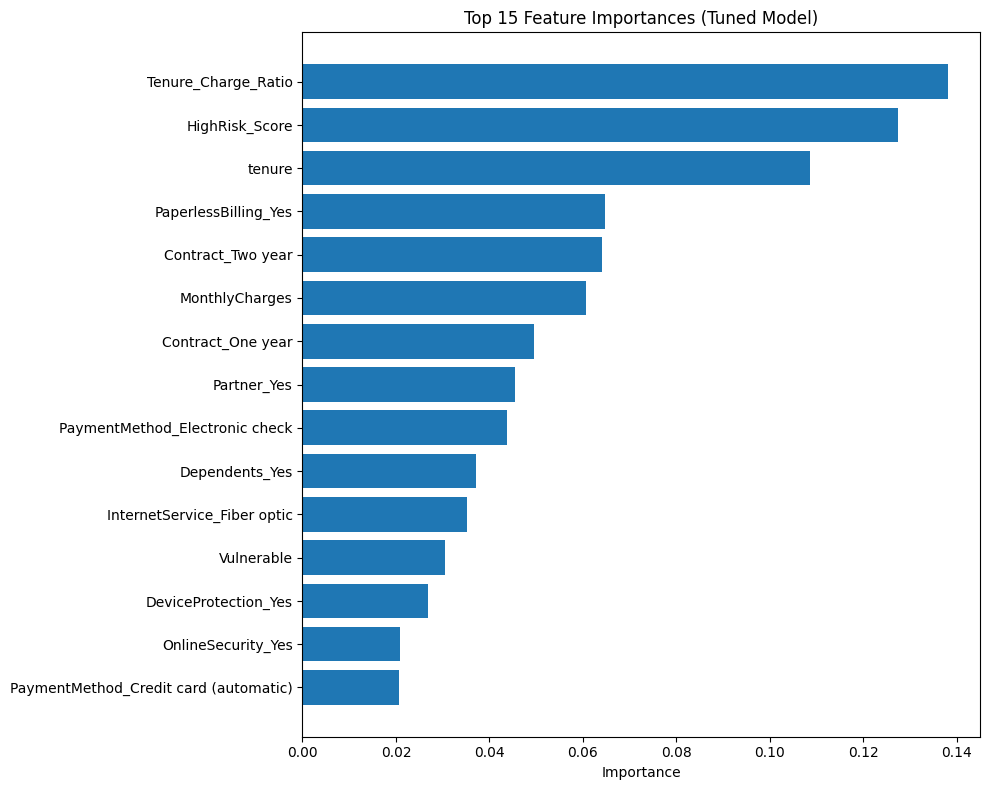


📊 Engineered Feature Importance:
HighRisk_Score: Rank #2, Importance: 0.1275
NoSupport: Rank #22, Importance: 0.0117
Vulnerable: Rank #12, Importance: 0.0305
Tenure_Charge_Ratio: Rank #1, Importance: 0.1380
ShortTenure_HighCharge: Rank #19, Importance: 0.0165


In [86]:
# See which features matter most
feature_names = []

# Get categorical feature names after one-hot encoding
cat_features = preprocessor_fe.named_transformers_['cat'].get_feature_names_out(cat_cols_fe)
feature_names.extend(cat_features)

# Add numerical features
feature_names.extend(num_cols_fe)

# Get importances
importances = best_gb_fe.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n" + "="*70)
print("TOP 20 MOST IMPORTANT FEATURES")
print("="*70)
print(feature_importance_df.head(20).to_string(index=False))

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
top_features = feature_importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Tuned Model)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Check if your engineered features are important
print("\n📊 Engineered Feature Importance:")
engineered = ['HighRisk_Score', 'NoSupport', 'Vulnerable', 
              'Tenure_Charge_Ratio', 'ShortTenure_HighCharge']
for feat in engineered:
    imp_row = feature_importance_df[feature_importance_df['Feature'] == feat]
    if not imp_row.empty:
        rank = feature_importance_df.index.get_loc(imp_row.index[0]) + 1
        print(f"{feat}: Rank #{rank}, Importance: {imp_row['Importance'].values[0]:.4f}")

In [87]:
import joblib

# Save the model and preprocessor
joblib.dump(best_gb_fe, 'churn_model_tuned.pkl')
joblib.dump(preprocessor_fe, 'preprocessor_fe.pkl')

# Save optimal threshold
import json
with open('model_config.json', 'w') as f:
    json.dump({
        'optimal_threshold': optimal_threshold,
        'best_params': grid_search.best_params_,
        'performance': {
            'missed_churners': int(fn),
            'false_alarms': int(fp),
            'recall': float(tp/(tp+fn)),
            'precision': float(tp/(tp+fp)),
            'roc_auc': float(roc_auc)
        }
    }, f, indent=2)

print("="*70)
print("✅ MODEL SAVED SUCCESSFULLY")
print("="*70)
print("Files saved:")
print("  - churn_model_tuned.pkl")
print("  - preprocessor_fe.pkl")
print("  - model_config.json")

✅ MODEL SAVED SUCCESSFULLY
Files saved:
  - churn_model_tuned.pkl
  - preprocessor_fe.pkl
  - model_config.json


In [88]:
def engineer_features(df, reference_median=None):
    """
    Apply feature engineering to new data.
    
    Parameters:
    -----------
    df : DataFrame
        Input dataframe with raw features
    reference_median : float, optional
        Median MonthlyCharges from training data (for consistency)
        
    Returns:
    --------
    df_engineered : DataFrame
        Dataframe with new features added
    median_value : float
        Median value used (for saving/reuse)
    """
    df_eng = df.copy()
    
    # 1. High-Risk Score (based on EDA insights)
    df_eng['HighRisk_Score'] = (
        (df['Contract'] == 'Month-to-month').astype(int) * 5 +
        (df['OnlineSecurity'] == 'No').astype(int) * 4 +
        (df['TechSupport'] == 'No').astype(int) * 4 +
        (df['OnlineBackup'] == 'No').astype(int) * 3 +
        (df['PaymentMethod'] == 'Electronic check').astype(int) * 3 +
        (df['PaperlessBilling'] == 'Yes').astype(int) * 2
    )
    
    # 2. No Support Services
    df_eng['NoSupport'] = (
        ((df['OnlineSecurity'] == 'No') | (df['OnlineSecurity'] == 'No internet service')) &
        ((df['TechSupport'] == 'No') | (df['TechSupport'] == 'No internet service'))
    ).astype(int)
    
    # 3. Vulnerable Customer
    df_eng['Vulnerable'] = (
        (df['Contract'] == 'Month-to-month') & 
        (df['PaymentMethod'] == 'Electronic check')
    ).astype(int)
    
    # 4. Tenure to Monthly Charge Ratio
    df_eng['Tenure_Charge_Ratio'] = df['tenure'] / (df['MonthlyCharges'] + 1)
    
    # 5. Short tenure + high charges
    # Use reference median from training data if provided
    if reference_median is None:
        reference_median = df['MonthlyCharges'].median()
    
    df_eng['ShortTenure_HighCharge'] = (
        (df['tenure'] < 12) & 
        (df['MonthlyCharges'] > reference_median)
    ).astype(int)
    
    return df_eng, reference_median


# Test the function on your training data
X_train_test, train_median = engineer_features(X_train)
print("✅ Feature engineering function created!")
print(f"Training data median MonthlyCharges: {train_median:.2f}")

✅ Feature engineering function created!
Training data median MonthlyCharges: 70.53


In [89]:
import json

# Save important reference values
feature_engineering_params = {
    'monthly_charges_median': float(train_median),
    'weak_features_to_drop': ['gender', 'MultipleLines'],
    'engineered_features': [
        'HighRisk_Score',
        'NoSupport', 
        'Vulnerable',
        'Tenure_Charge_Ratio',
        'ShortTenure_HighCharge'
    ]
}

# Save to file
with open('feature_engineering_params.json', 'w') as f:
    json.dump(feature_engineering_params, f, indent=2)

print("Feature engineering parameters saved!")

Feature engineering parameters saved!


In [93]:
import joblib
import json
import pandas as pd

class ChurnPredictor:
    """
    Complete pipeline for churn prediction on new data
    """
    
    def __init__(self, model_path, preprocessor_path, config_path, fe_params_path):
        """Load saved model and configurations"""
        self.model = joblib.load(model_path)
        self.preprocessor = joblib.load(preprocessor_path)
        
        with open(config_path, 'r') as f:
            self.config = json.load(f)
        
        with open(fe_params_path, 'r') as f:
            self.fe_params = json.load(f)
        
        self.threshold = self.config['optimal_threshold']
        self.median_charges = self.fe_params['monthly_charges_median']
        self.weak_features = self.fe_params['weak_features_to_drop']
        
        print("✅ Churn Predictor loaded successfully!")
        print(f"   Model: {model_path}")
        print(f"   Threshold: {self.threshold}")
    
    def engineer_features(self, df):
        """Apply feature engineering to new data"""
        df_eng = df.copy()
        
        # High-Risk Score
        df_eng['HighRisk_Score'] = (
            (df['Contract'] == 'Month-to-month').astype(int) * 5 +
            (df['OnlineSecurity'] == 'No').astype(int) * 4 +
            (df['TechSupport'] == 'No').astype(int) * 4 +
            (df['OnlineBackup'] == 'No').astype(int) * 3 +
            (df['PaymentMethod'] == 'Electronic check').astype(int) * 3 +
            (df['PaperlessBilling'] == 'Yes').astype(int) * 2
        )
        
        # No Support Services
        df_eng['NoSupport'] = (
            ((df['OnlineSecurity'] == 'No') | (df['OnlineSecurity'] == 'No internet service')) &
            ((df['TechSupport'] == 'No') | (df['TechSupport'] == 'No internet service'))
        ).astype(int)
        
        # Vulnerable Customer
        df_eng['Vulnerable'] = (
            (df['Contract'] == 'Month-to-month') & 
            (df['PaymentMethod'] == 'Electronic check')
        ).astype(int)
        
        # Tenure to Charge Ratio
        df_eng['Tenure_Charge_Ratio'] = df['tenure'] / (df['MonthlyCharges'] + 1)
        
        # Short tenure + high charges (use saved median)
        df_eng['ShortTenure_HighCharge'] = (
            (df['tenure'] < 12) & 
            (df['MonthlyCharges'] > self.median_charges)
        ).astype(int)
        
        return df_eng
    
    def preprocess(self, df):
        """Complete preprocessing pipeline"""
        # 1. Drop weak features
        df_processed = df.drop(columns=self.weak_features, errors='ignore')
        
        # 2. Apply feature engineering
        df_processed = self.engineer_features(df_processed)
        
        # 3. Apply trained preprocessor (encoding + scaling)
        X_processed = self.preprocessor.transform(df_processed)
        
        return X_processed
    
    def predict(self, df):
        """
        Predict churn for new customers
        
        Parameters:
        -----------
        df : DataFrame
            New customer data (same format as training data)
            
        Returns:
        --------
        predictions : dict
            Dictionary with predictions and probabilities
        """
        # Preprocess
        X_processed = self.preprocess(df)
        
        # Get probabilities
        probabilities = self.model.predict_proba(X_processed)[:, 1]
        
        # Apply threshold
        predictions = (probabilities >= self.threshold).astype(int)
        
        # Create results dataframe
        results = pd.DataFrame({
            'Churn_Probability': probabilities,
            'Churn_Prediction': predictions,
            'Churn_Label': ['Yes' if p == 1 else 'No' for p in predictions],
            'Risk_Level': ['High' if prob > 0.7 else 'Medium' if prob > 0.4 else 'Low' 
                          for prob in probabilities]
        })
        
        return results
    
    def predict_single(self, customer_data):
        """Predict for a single customer (as dictionary)"""
        df = pd.DataFrame([customer_data])
        return self.predict(df)


# Initialize the predictor
predictor = ChurnPredictor(
    model_path='churn_model_tuned.pkl',
    preprocessor_path='preprocessor_fe.pkl',
    config_path='model_config.json',
    fe_params_path='feature_engineering_params.json'
)

✅ Churn Predictor loaded successfully!
   Model: churn_model_tuned.pkl
   Threshold: 0.32


In [94]:
# Example 1: Predict on test set (to verify it works)
print("="*70)
print("Testing on existing test data:")
print("="*70)

# Use your actual test data
predictions_test = predictor.predict(X_test)
print(predictions_test.head(10))

# Verify accuracy
print(f"\nAccuracy check: {(predictions_test['Churn_Prediction'].values == y_test_encoded_V2).mean()*100:.1f}%")

Testing on existing test data:
   Churn_Probability  Churn_Prediction Churn_Label Risk_Level
0           0.909244                 1         Yes       High
1           0.141698                 0          No        Low
2           0.012622                 0          No        Low
3           0.952203                 1         Yes       High
4           0.036905                 0          No        Low
5           0.446185                 1         Yes     Medium
6           0.023434                 0          No        Low
7           0.011141                 0          No        Low
8           0.075421                 0          No        Low
9           0.554802                 1         Yes     Medium

Accuracy check: 72.9%


In [95]:
# Example 2: Predict for a single new customer
print("\n" + "="*70)
print("Predicting for a SINGLE NEW CUSTOMER:")
print("="*70)

new_customer = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 3,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 85.0
}

result = predictor.predict_single(new_customer)
print("\nPrediction:")
print(result)

if result['Churn_Label'].values[0] == 'Yes':
    print(f"\n⚠️ HIGH RISK: This customer has {result['Churn_Probability'].values[0]*100:.1f}% chance of churning!")
    print("Recommended actions: Offer retention incentives, longer contract, or add-on services")


Predicting for a SINGLE NEW CUSTOMER:

Prediction:
   Churn_Probability  Churn_Prediction Churn_Label Risk_Level
0           0.891193                 1         Yes       High

⚠️ HIGH RISK: This customer has 89.1% chance of churning!
Recommended actions: Offer retention incentives, longer contract, or add-on services


In [96]:
# Example 3: Batch prediction on new customer file
print("\n" + "="*70)
print("BATCH PREDICTION on CSV file:")
print("="*70)

# Simulate loading new data
# new_customers = pd.read_csv('new_customers.csv')

# For demo, let's use a sample from test set
new_customers = X_test.head(20).copy()

# Make predictions
batch_predictions = predictor.predict(new_customers)

# Combine with original data
results_df = pd.concat([
    new_customers.reset_index(drop=True), 
    batch_predictions
], axis=1)

print("\nSample predictions:")
print(results_df[['Contract', 'tenure', 'MonthlyCharges', 
                  'Churn_Probability', 'Risk_Level', 'Churn_Label']].head(10))

# Summary
print(f"\n📊 Summary:")
print(f"Total customers: {len(results_df)}")
print(f"Predicted to churn: {(batch_predictions['Churn_Prediction'] == 1).sum()}")
print(f"High risk (>70%): {(batch_predictions['Churn_Probability'] > 0.7).sum()}")
print(f"Medium risk (40-70%): {((batch_predictions['Churn_Probability'] > 0.4) & (batch_predictions['Churn_Probability'] <= 0.7)).sum()}")
print(f"Low risk (<40%): {(batch_predictions['Churn_Probability'] <= 0.4).sum()}")


BATCH PREDICTION on CSV file:

Sample predictions:
         Contract  tenure  MonthlyCharges  Churn_Probability Risk_Level  \
0  Month-to-month       1           24.80           0.909244       High   
1  Month-to-month      41           25.25           0.141698        Low   
2        Two year      52           19.35           0.012622        Low   
3  Month-to-month       1           76.35           0.952203       High   
4        Two year      67           50.55           0.036905        Low   
5  Month-to-month      68           89.60           0.446185     Medium   
6        Two year      23           77.15           0.023434        Low   
7        Two year      72           72.10           0.011141        Low   
8        Two year      70          104.00           0.075421        Low   
9  Month-to-month       1           19.40           0.554802     Medium   

  Churn_Label  
0         Yes  
1          No  
2          No  
3         Yes  
4          No  
5         Yes  
6         

In [97]:
# Save the complete predictor class as a module
predictor_code = '''
import joblib
import json
import pandas as pd

class ChurnPredictor:
    # ... (copy the complete class from above)
'''

with open('churn_predictor.py', 'w') as f:
    f.write(predictor_code)

print("="*70)
print("PRODUCTION FILES READY")
print("="*70)
print("Files created:")
print("  📁 churn_model_final.pkl")
print("  📁 preprocessor_final.pkl") 
print("  📁 model_config_final.json")
print("  📁 feature_engineering_params.json")
print("  📁 churn_predictor.py")
print("\n💡 To use in production:")
print("  from churn_predictor import ChurnPredictor")
print("  predictor = ChurnPredictor(...)")
print("  predictions = predictor.predict(new_data)")

PRODUCTION FILES READY
Files created:
  📁 churn_model_final.pkl
  📁 preprocessor_final.pkl
  📁 model_config_final.json
  📁 feature_engineering_params.json
  📁 churn_predictor.py

💡 To use in production:
  from churn_predictor import ChurnPredictor
  predictor = ChurnPredictor(...)
  predictions = predictor.predict(new_data)
